# Importing Libraries
in this part we will install all the necessary libraries on command prompt and then import the necessary functions from those libraries. 

In [182]:
# importing all the necessary libraries
import pandas as pd

import numpy as np
import time

# step 1: preprocessing
from sklearn.impute import SimpleImputer # import some strategic imputer to fill in any missing values using mean
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, Normalizer # scale all the values to one range to avoid any biasness (this bias is seen in mostly naive bayes and knn etc)

from sklearn.impute import KNNImputer # import some strategic imputer to fill missing values using KNN (finds the nearest neighbour and fills it with that value)

from sklearn.decomposition import PCA

# step 2: data division
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score # to divide the code into train/test using a specific percentage or with/without replacement

# step 3: decision trees creation and tuning
from sklearn.tree import DecisionTreeClassifier # to intialize a decision tree maker, its hyper parameters can be defined or set by a grid
from sklearn.model_selection import GridSearchCV # to set different hyper parameters for creating a decision tree

# step 4: displaying accuracy
from sklearn.metrics import roc_auc_score # to display the accuracy of our tree

In [183]:
# use this block to install any libraries not on the system
# !pip install pandas
# !pip install sklearn
# python -m pip install scikit-learn lightgbm xgboost catboost

# Data Loading
data shall be loaded into variables as data sets using pandas and csv readers. they will be checked to see if they are loaded properly and will be loaded as 2 sets: train and test as per given in the kaggle data

In [184]:
# lets load the training data set
train_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger1\iml-fall-2024-challenge-1\train_set.csv")

# lets also check it by getting the first few rows of the data, there should be x1 - x78 and one target variable Y
train_data.head() 

,RecordId,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X70,X71,X72,X73,X74,X75,X76,X77,X78,Y
0,1,87.000000,34.118411,0,2,0,165.100000,1,829,2,...,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2,82.372284,31.573280,0,0,1,162.983897,1,724,0,...,0.033431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3,50.000000,27.771653,0,0,1,165.100000,1,895,2,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4,66.236109,26.515922,0,0,1,167.009549,1,637,0,...,0.039363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5,81.303299,20.843691,0,0,1,158.165419,0,564,0,...,0.069242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [185]:
# lets load the test data
test_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger1\iml-fall-2024-challenge-1\test_set.csv")

# check if the data has been loaded by getting the first 5 rows - there should be x1 - x78 and no target variable Y as this is test data
test_data.head() 

,RecordId,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78
0,300001,79.000000,17.122318,0,0,1,170.200000,1,700,0,...,0.070000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,300002,38.000000,43.693579,0,0,1,165.100000,1,814,0,...,0.050000,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,300003,36.064225,23.998944,0,0,1,167.086735,1,662,0,...,0.006948,0.006948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,300004,61.846764,31.693449,0,3,1,182.355708,2,862,0,...,0.062613,0.033153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,300005,71.591991,20.086147,1,0,1,166.704917,2,335,0,...,0.014854,0.004854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing
before we start processing this data and using algorithms, we will fix this data first, this is called data preprocessing

## Conversion of Categorical to Numerical
First we will convert categorical data to numerical data by doing one hot encoding, which turns it into binary variables

In [186]:
# one hot encoding - display it
pd.get_dummies(train_data) # this line will convert the train_data to one hot encoding but it will only display the result and not save it

,RecordId,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X70,X71,X72,X73,X74,X75,X76,X77,X78,Y
0,1,87.000000,34.118411,0,2,0,165.100000,1,829,2,...,0.040000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
1,2,82.372284,31.573280,0,0,1,162.983897,1,724,0,...,0.033431,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
2,3,50.000000,27.771653,0,0,1,165.100000,1,895,2,...,0.010000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
3,4,66.236109,26.515922,0,0,1,167.009549,1,637,0,...,0.039363,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
4,5,81.303299,20.843691,0,0,1,158.165419,0,564,0,...,0.069242,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246117,246118,65.149110,33.357948,0,0,1,156.317941,1,711,0,...,0.027152,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0
246118,246119,48.000000,46.736176,0,0,1,157.000000,1,594,2,...,0.560000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1
246119,246120,57.472080,41.854115,1,0,0,189.868698,2,455,0,...,0.020601,0.0,0.0,0.587987,0.0,0.412013,0.0,0.0,0.412013,0
246120,246121,66.000000,23.738662,1,0,1,168.000000,2,609,0,...,-1.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0


In [187]:
# we can see that there is no change in the number of columns meaning there is no categorical data. but for the sake of running the program. we must perform the preprocessing therefore we shall re-run the one hot encoding and save it somewhere
train_data_processed = pd.get_dummies(train_data)

# now we shall do the same on the test data so that we maintain the rules over all data
test_data_processed = pd.get_dummies(test_data)

## Data Splitting - festures and targets
the data in train_data set is of x1 - x78 columns (79 variables) and one target variable (Y). we must split that data so that we can perform data preprocessing on the features variables (will be referred to as X).

In [188]:
# so in X, it is ALL the columns EXCEPT the last column known as 'Y' (we can confirm this using the train_data.head() we did earlier) so we must get all columns and DROP only the 'y' column
X = train_data_processed.drop(columns=['Y'])
X # lets display X and see what it is now

,RecordId,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78
0,1,87.000000,34.118411,0,2,0,165.100000,1,829,2,...,0.110000,0.040000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1,2,82.372284,31.573280,0,0,1,162.983897,1,724,0,...,0.100292,0.033431,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,3,50.000000,27.771653,0,0,1,165.100000,1,895,2,...,0.020000,0.010000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,4,66.236109,26.515922,0,0,1,167.009549,1,637,0,...,0.108249,0.039363,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
4,5,81.303299,20.843691,0,0,1,158.165419,0,564,0,...,0.164645,0.069242,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246117,246118,65.149110,33.357948,0,0,1,156.317941,1,711,0,...,0.088610,0.027152,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
246118,246119,48.000000,46.736176,0,0,1,157.000000,1,594,2,...,-1.000000,0.560000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
246119,246120,57.472080,41.854115,1,0,0,189.868698,2,455,0,...,0.032961,0.020601,0.0,0.0,0.587987,0.0,0.412013,0.0,0.0,0.412013
246120,246121,66.000000,23.738662,1,0,1,168.000000,2,609,0,...,0.020000,-1.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000


In [189]:
# so as per our X output, we can see that number of columns in train_data is 79 and number of columns in X is 78 meaning we have successfully performed our removal of target variable
# now to get the target variable alone, we can just get it alone,
Y = train_data_processed['Y']
Y # lets see what it is
# as per our Y output, we can see it is of one column and 246k rows which means we have successfully extracted the target variable column

0         0
1         0
2         0
3         0
4         0
         ..
246117    0
246118    1
246119    0
246120    0
246121    0
Name: Y, Length: 246122, dtype: int64

## Data Imputation 
many cells in our data may be empty - we must fill these cells with data. we have multiple options to deal with them:
- we remove the entire rows (Case 1)
- we fill the cells with the average of the column (Case 2)
- we fill the cells based on KNN imputation (nearest neighbour) (Case 3)

In [190]:
# remove rows method
# ----------------------------- case 1 to case 10 -----------------------------
# in this case, lets remove the entire rows that have NaN values. before saving the removed rows data set, lets first run it and display it to see the outcome, then we shall save in X
# X.dropna(axis=0)

In [191]:
# # remove rows method
# ----------------------------- case 1 to case 10 -----------------------------
# # so we originally had 246122 rows and now after removing empty cell rows we have 239650 rows which is a 6472 rows difference. as our first try, lets work with it. lets assign this data set in place of X
# X = X.dropna(axis=0)
# X
# these above 2 lines were commented out as there was an error handling, rows were being removed from X and not from Y so we fixed it by removing from train_data and then splitting into X and Y
# train_data_processed = train_data_processed.dropna(axis=0)

In [192]:
# Average Mean Imputation
# ----------------------------- case 11, 13, 15, 17, 19 -----------------------------
# this will fill all the empty spaces using the average of all the spaces
# imputer = SimpleImputer(strategy='mean')

In [ ]:
# KNN Imputation
# ----------------------------- case 12, 14, 16, 18, 20 to 30, 156, 158 -----------------------------
# this fills them in using k-nearest neighbours of all the spaces
imputer = KNNImputer(n_neighbors=7)
# --
# imputer = KNNImputer(n_neighbors=5)   # case 12, 18, 24
# imputer = KNNImputer(n_neighbors=3)   # case 14, 21, 23
# imputer = KNNImputer(n_neighbors=7)   # case 16, 20, 22, 25 to 30, 156, 158

In [194]:
X = imputer.fit_transform(X)                                        # fill them in X
test_data_processed = imputer.fit_transform(test_data_processed)    # fill them in test data

## Data Scaling
some columns may be very large then other columns when compared. it would not affect at the moment as we are using decision trees, but to maintain a fair enviroment, we shall perform scaling on every run.
there are two types of scaling: 
- min max scaling (also known as normalization)
- standardisation (z-score normalization)
- max abs scaler
- robust scaler
- normalizer

In [195]:
# Min Max Scaler
# ----------------------------- case 1 to case 12, 21, 22 -----------------------------
# in this case we shall perform min max scaling. to do that, we must use our MinMaxScaler that we have imported above
# scaler = MinMaxScaler()
# # now we must use this scaler to scale X
# scaler.fit_transform(X)

In [196]:
# Standard Scaler
# ----------------------------- case 13 to case 14 -----------------------------
# scaler = StandardScaler()
# # now we must use this scaler to scale X
# scaler.fit_transform(X)

In [ ]:
# Max Absolute Scaler
# ----------------------------- case 15 to case 16, 23 to 30, 156, 158 -----------------------------
scaler = MaxAbsScaler()
# now we must use this scaler to scale X
scaler.fit_transform(X)

array([[4.06302565e-06, 9.77528090e-01, 5.03110176e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.12605131e-06, 9.25531276e-01, 4.65579663e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.21890770e-05, 5.61797753e-01, 4.09520864e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99991874e-01, 6.45753712e-01, 6.17180876e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.12013395e-01],
       [9.99995937e-01, 7.41573034e-01, 3.50050368e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.64692584e-01, 4.82989245e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [198]:
# Robust Scaler
# ----------------------------- case 17 to case 18 -----------------------------
# scaler = RobustScaler()
# # now we must use this scaler to scale X
# scaler.fit_transform(X)

In [199]:
# Normalizer Scaler
# ----------------------------- case 19 to case 20 -----------------------------
# scaler = Normalizer()
# # now we must use this scaler to scale X
# scaler.fit_transform(X)

In [200]:
# fit the scaler - runs for all
# our output shows us that every value in the array is between 0 and 1. thus lets save this value on X
X = scaler.fit_transform(X)

# now we must do the same on our test_data set
test_data_processed = scaler.fit_transform(test_data_processed)

# PCA
principal component analysis

In [ ]:
# ---------------------- CASE 156, 158 ----------------------
pca = PCA(n_components=24)                                  # case 158
X = pca.fit_transform(X)
test_data_processed = pca.transform(test_data_processed)
# --
# pca = PCA(n_components=15)                                # case 156

Cumulative explained variance: [0.1495171  0.26263393 0.36785899 0.44556092 0.51063964 0.55650573
 0.59655267 0.62830431 0.65988035 0.6895308  0.71492548 0.73865492
 0.7620061  0.78429172 0.80461263 0.82288486 0.83584002 0.8481433
 0.85906995 0.86933164 0.87869748 0.88773651 0.89600653 0.90321484]


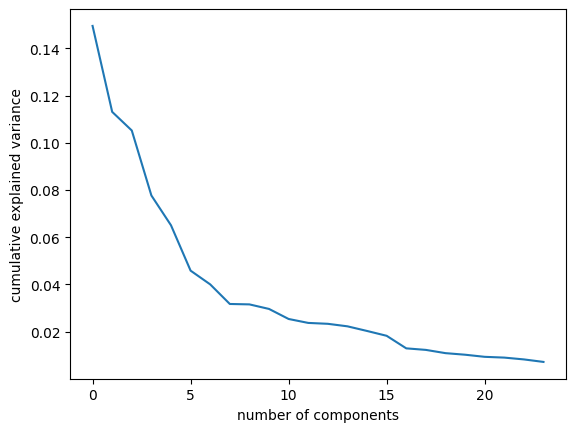

In [202]:
# plot an elbow graph to find the optimal number of components
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
pca.explained_variance_ratio_.round(3)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_variance)

## Data Splitting - train and validate
now our test_data set is of rows with NO target variable whereas the train_data set is WITH target variable. there are two ways:

- our rules in machine learning is that we must train half or 70% of the data and then we must check its accuracy using the remaining half or 30% of the data - we can only check accuracy IF we have the answers i.e. the target variable. 
So, what we need to do is, is split the train_data set into 2, by a 70% and 30% ratio. we train the model using the 70% and then test the model using the 30% and then use that model to predict the test_data set.
- k cross fold: we part the data into k groups and keep k-1 as train and 1 as test

In [ ]:
# ----------------------------- case 1 to case 27, 156, 158 -----------------------------
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3)

In [204]:
# ----------------------------- case 28 to case 30 -----------------------------
# crossfold = RepeatedKFold(n_splits=15, n_repeats=1)#, random_state=1)

# Model Algorithm Running
now we shall begin running our model

In [ ]:
# lets intialize our decision tree with some parameters
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15, max_features=60, min_samples_leaf=80)
# --
# decisiontree = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=20)                                            # case 1
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=20)                                         # case 2 
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=15)                                         # case 3
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=15)                                         # case 4
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=15)                                         # case 5
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15)                                         # case 6
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)                                         # case 7
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15, max_features=10)                        # case 8
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15, max_features=50)                        # case 9
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15, max_features=60)                        # case 10 to 24
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15, max_features=60, min_samples_leaf=50)   # case 25
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15, max_features=60, min_samples_leaf=80)   # case 26
# decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15, max_features=60, min_samples_leaf=100)  # case 27 to 30, 156, 158

In [ ]:
# ----------------------------- case 1 to case 27, 156, 158 -----------------------------
# now lets fit this model onto our data
decisiontree.fit(trainX, trainY)

# after fitting, lets predict our testX and analyse the accuracy
prediction = decisiontree.predict(testX)

# now lets calculate the ROC AUC score according to this prediction
roc_score = roc_auc_score(testY, prediction)

print("roc score = ", roc_score)

roc score =  0.5


In [213]:
# ----------------------------- case 28 to case 30 -----------------------------
# scores = cross_val_score(decisiontree, X, Y, scoring="roc_auc", cv = crossfold)     
# score = format(mean(scores), '.4f')
# score

## predict for test dataset
fit the model and predict for test dataset

In [214]:
decisiontree.fit(X, Y)

test_prediction = decisiontree.predict_proba(test_data_processed)

test_prediction=test_prediction[:, 1]

print(test_prediction)

[0.00039679 0.01362436 0.00171322 ... 0.00039679 0.00039679 0.00171322]


## write into csv
now we write the predictions into the csv file

In [215]:
sample_data = pd.read_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger1\iml-fall-2024-challenge-1\sample_submission.csv")

sample_data['Y'] = test_prediction
sample_data

sample_data.to_csv(r"D:\Users\DELL\OneDrive - Institute of Business Administration\IBA\sem5\machine learning\ipynb notebooks\challenger1\iml-fall-2024-challenge-1\dt1.csv", index=False)
sample_data

,RecordId,Y
0,300001,0.000397
1,300002,0.013624
2,300003,0.001713
3,300004,0.002072
4,300005,0.000397
...,...,...
105477,405478,0.001798
105478,405479,0.094340
105479,405480,0.000397
105480,405481,0.000397


In [216]:
decisiontree

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=60,
                       min_samples_leaf=80, min_samples_split=15)